In [1]:
from pyexpat import features

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv')

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [5]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
data.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()

In [8]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [10]:
data.dtypes[data.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [11]:
strings = data.dtypes[data.dtypes == 'object'].index

In [12]:
for col in strings:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [13]:
data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


EDA

In [14]:
for col in data.columns:
    print(col,":",data[col].nunique())

make : 48
model : 914
year : 28
engine_fuel_type : 10
engine_hp : 356
engine_cylinders : 9
transmission_type : 5
driven_wheels : 4
number_of_doors : 3
market_category : 71
vehicle_size : 3
vehicle_style : 16
highway_mpg : 59
city_mpg : 69
popularity : 48
msrp : 6049


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
sns.histplot(data.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

In [17]:
sns.histplot(data.msrp[data.msrp<100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

In [18]:
sns.histplot(data.msrp[data.msrp>100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

In [19]:
## Apply logrithmic distribution
np.log1p([1, 10, 100, 1000])

array([0.69314718, 2.39789527, 4.61512052, 6.90875478])

`np.log1p([1, 10, 100, 1000]) == np.log(0+1, 10+1, 100+1, 1000+1)`

In [20]:
sns.histplot(np.log1p(data.msrp), bins=50) #tail is vanished

<Axes: xlabel='msrp', ylabel='Count'>

In [21]:
## Missing values
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setup Validation Environment

In [22]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
data_train = data.iloc[n_train:]
data_val = data.iloc[n_train:n_val]
data_test = data.iloc[n_val:n_val+n_test]

In [24]:
## with shuffles
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [25]:
n_train

7150

In [26]:
n_val

2382

In [27]:
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

In [28]:
data_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [29]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [30]:
np.log1p(data_train.msrp.values)

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [31]:
y_train = np.log1p(data_train.msrp.values)
y_test = np.log1p(data_test.msrp.values)
y_val = np.log1p(data_val.msrp.values)

In [32]:
## remove msrp from data
del data_train['msrp']
del data_val['msrp']   
del data_test['msrp']

In [33]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [34]:
x1 = [453, 11, 86]
W0 = 0
W = [1, 1, 1]

In [35]:
def linear_regression(x, W0, W):
    assert len(x) == len(W)
    y = W0
    for i in range(len(x)):
        y = y + W[i] * x[i]
    
    return y

In [36]:
linear_regression(x=x1, W0=7.17, W=[0.01, 0.04, 0.0002])

12.1572

In [37]:
np.exp(12.1572)

np.float64(190460.4803887146)

In [38]:
np.expm1(12.1572)

np.float64(190459.4803887146)

### 2.6 Linear regression vector form

In [39]:
def dot(xi,w):
    assert len(xi) == len(w)
    res = 0.0
    for j in range(len(xi)):
        res += xi[j] * w[j]
    return res

In [40]:
def linear_regression(xi,w,W0):
    return W0 + dot(xi, w)

In [41]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.0002]
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.0002]

In [42]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]
X = [x1,x2,x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [43]:
X.dot(w_new)

array([ 9.887 ,  9.8962, 12.1572])

In [44]:
def linear_regression(X):
    return X.dot(w_new)

2.7 Training Linear Regression Model

In [45]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [46]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [47]:
# X.T.dot(X)

In [48]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [50]:
XTX = X.transpose().dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [51]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [52]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [53]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  1.04083409e-17,  5.55111512e-17,
        -8.67361738e-19],
       [ 1.81898940e-12,  1.00000000e+00,  0.00000000e+00,
        -6.66133815e-16],
       [ 5.68434189e-14,  4.44089210e-16,  1.00000000e+00,
        -2.77555756e-17],
       [ 9.09494702e-13,  5.32907052e-15,  2.84217094e-14,
         1.00000000e+00]])

In [54]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [55]:
list(np.column_stack([ones,X]))

[array([1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1.,   1., 453.,  11.,  86.]),
 array([  1.,   1., 158.,  24., 185.]),
 array([  1.,   1., 172.,  25., 201.]),
 array([  1.,   1., 413.,  11.,  86.]),
 array([  1.,   1.,  38.,  54., 185.]),
 array([  1.,   1., 142.,  25., 431.]),
 array([  1.,   1., 453.,  31.,  86.])]

In [56]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [57]:
train_linear_regression(X,y)

(np.float64(25844.754055766953),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

2.8 Car Price model

In [58]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [59]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [60]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [61]:
X_train = data_train[base].fillna(0).values

In [62]:
w0,w = train_linear_regression(X_train,y_train)

In [63]:
y_pred = w0 + X_train.dot(w)

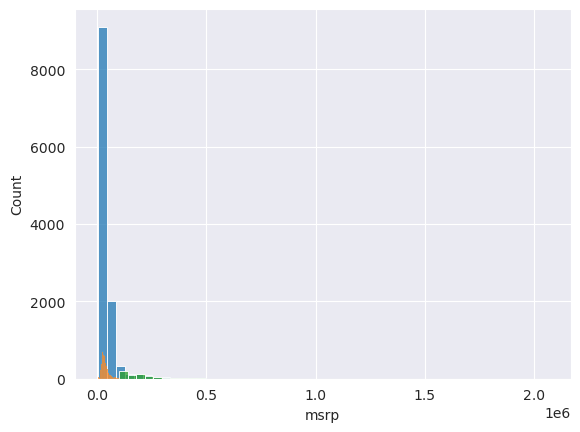

In [64]:
sns.histplot(y_pred, color='red',alpha=0.5,bins=50)
sns.histplot(y_train, color='blue',alpha=0.5,bins=50)
plt.show()

In [65]:
 e=y_train-y_pred
 e

array([0.02781925, 0.50032323, 0.22125759, ..., 0.14957294, 0.64458959,
       0.54198867], shape=(7150,))

In [66]:
rmse = np.sqrt(np.mean(np.power(e,2)))
rmse

np.float64(0.7554192603920132)

In [67]:
def RMSE(y,y_pred):
    e = y-y_pred
    se = e**2
    mse = se.mean()
    return np.sqrt(mse)

In [68]:
RMSE(y_train,y_pred)

np.float64(0.7554192603920132)

2.10 Validating the model

In [69]:
def prepare_df(df: pd.DataFrame,base:list)-> np.array:
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [70]:
X_train = prepare_df(data_train,base=base)
w0, w = train_linear_regression(X_train,y_train)
X_val = prepare_df(data_val,base=base)

In [71]:
train_linear_regression(X_train,y_train)

(np.float64(7.927257388070113),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [72]:
y_pred = w0 + X_val.dot(w)
y_pred
RMSE(y_val,y_pred)

np.float64(0.7616530991301562)

2.11 Simple Feature Engineering

In [73]:
data_train.year.max()

2017

In [75]:
data_train.year.max() - data_train.year

2735      9
6720      5
5878      1
11190    26
4554      0
         ..
434       2
1902      2
9334      2
5284      3
2420      0
Name: year, Length: 7150, dtype: int64

In [86]:
def prepare_X(df: pd.DataFrame,base:list)-> np.array:
    df = df.copy()
    df['age'] = 2017 - df.year

    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [87]:
X_train = prepare_X(data_train,base=base)

In [88]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [89]:
w0, w = train_linear_regression(X_train,y_train)
X_val = prepare_df(data_val,base=base)
y_pred = w0 + X_val.dot(w)
y_pred
RMSE(y_val,y_pred)

/tmp/ipykernel_76758/2559831551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = data_train.year.max() - data_train.year


np.float64(1.0477701488262732)

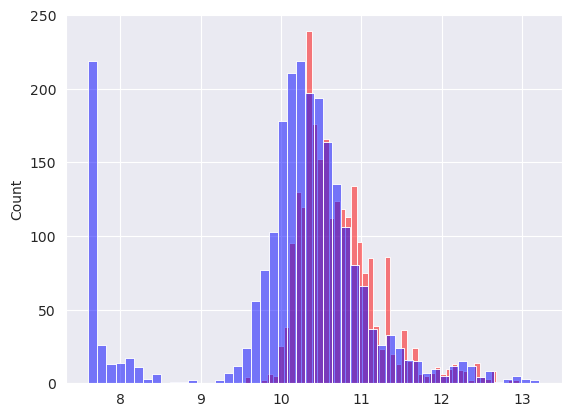

In [91]:
sns.histplot(y_pred, color='red',alpha=0.5,bins=50)
sns.histplot(y_val, color='blue',alpha=0.5,bins=50)
plt.show()

2.12 Categorical Variables

In [95]:
data_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [99]:
data_train.number_of_doors.median()

4.0

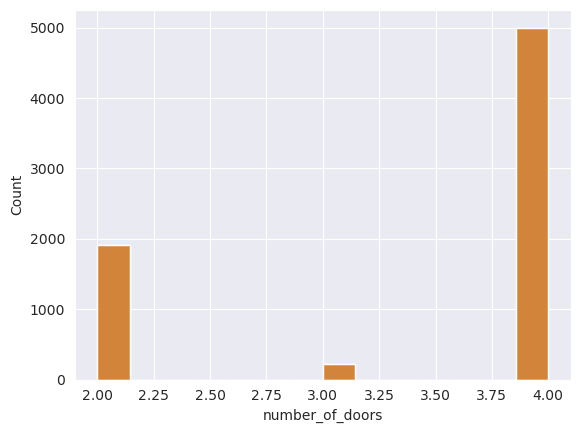

In [101]:
sns.histplot(data_train.number_of_doors)
plt.show()

In [103]:
(data_train.number_of_doors == 4).astype('int')

2735     0
6720     1
5878     1
11190    0
4554     1
        ..
434      0
1902     0
9334     1
5284     1
2420     1
Name: number_of_doors, Length: 7150, dtype: int64

In [104]:
for v in [2,3,4]:
    data_train[f'num_doors_{v}'] = (data_train.number_of_doors == v).astype('int')

/tmp/ipykernel_76758/3835238479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[f'num_doors_{v}'] = (data_train.number_of_doors == v).astype('int')
/tmp/ipykernel_76758/3835238479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[f'num_doors_{v}'] = (data_train.number_of_doors == v).astype('int')
/tmp/ipykernel_76758/3835238479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [105]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [107]:
def prepare_X(df: pd.DataFrame,base:list)-> np.array:
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X =df_num.values
    return X

In [109]:
prepare_X(data_train,base=base)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [111]:
data_train.make.value_counts()

make
chevrolet        667
ford             519
volkswagen       489
toyota           452
dodge            367
nissan           328
gmc              313
mazda            263
cadillac         249
honda            247
suzuki           210
mercedes-benz    208
bmw              202
infiniti         195
audi             192
hyundai          177
volvo            165
acura            155
subaru           154
kia              135
lexus            134
pontiac          125
mitsubishi       122
buick            121
chrysler         120
oldsmobile       102
land_rover        89
porsche           85
lincoln           82
saab              72
aston_martin      58
plymouth          48
bentley           45
ferrari           43
fiat              40
maserati          38
scion             36
lamborghini       31
lotus             16
rolls-royce       13
tesla             13
maybach           11
hummer             9
genesis            3
spyker             3
bugatti            2
mclaren            1
alfa_rom

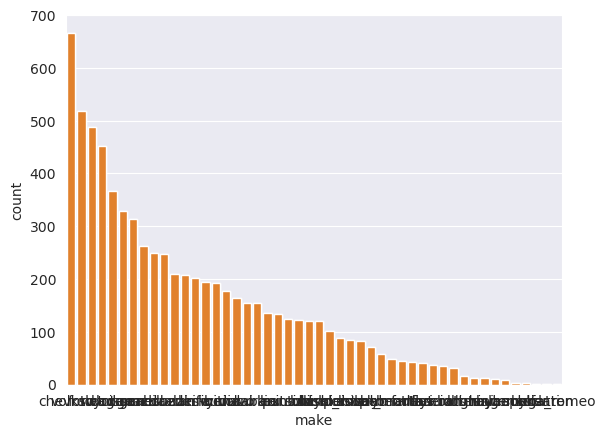

In [113]:
sns.barplot(data_train.make.value_counts())
plt.show()

In [116]:
list(data_train.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [117]:
makes = list(data_train.make.value_counts().head().index)

In [118]:
def prepare_X(df: pd.DataFrame,base:list)-> np.array:
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for v in makes:
        df[f'make_{v}'] = (df.make == v).astype('int')
        features.append(f'make_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X =df_num.values
    return X

In [119]:
prepare_X(data_train,base=base)

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]], shape=(7150, 14))

In [122]:
X_train = prepare_X(data_train,base=base)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val,base=base)
y_pred = w0 + X_val.dot(w)
RMSE(y_val, y_pred)

np.float64(0.5076038849557032)

In [128]:
categorical_columns = ['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']
categorical_columns

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [129]:
categories = {}
for c in categorical_columns:
    categories[c] = list(data_train[c].value_counts().head().index)

In [132]:
categories.items()

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('transmission_type', ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'hatchback', 'luxury,performance']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])

In [140]:
def prepare_X(df: pd.DataFrame,base:list)-> np.array:
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for v in makes:
        df[f'make_{v}'] = (df.make == v).astype('int')
        features.append(f'make_{v}')

    for c,vals in categories.items():
        for v in vals:
            df[f'{c}_{v}'] = (df[c]==v).astype('int')
            features.append(f'{c}_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X =df_num.values
    return X

In [141]:
X_train = prepare_X(data_train,base=base)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val,base=base)
y_pred = w0 + X_val.dot(w)
RMSE(y_val, y_pred)

np.float64(1037.9337902315444)

2.13 Regularization

In [142]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [148]:
X_train = prepare_X(data_train,base=base)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.01)

X_val = prepare_X(data_val,base=base)
y_pred = w0 + X_val.dot(w)
RMSE(y_val, y_pred)

np.float64(0.4565220034358536)

2.14 Tuning the model

In [150]:
for r in [0, 0.000001, 0.00001,0.0001,0.001,0.01,0.1,1,10]:
    X_train = prepare_X(data_train,base=base)
    w0, w = train_linear_regression_reg(X_train, y_train,r=r)

    X_val = prepare_X(data_val,base=base)
    y_pred = w0 + X_val.dot(w)
    score = RMSE(y_val, y_pred)

    print(f'{r} | {w0} | {score}')

0 | 774628428495485.2 | 1037.9337902315444
1e-06 | -145.93174671339943 | 0.4565169078457485
1e-05 | 6.877887554817032 | 0.4565170098443526
0.0001 | 6.281913442581324 | 0.45651705933291975
0.001 | 6.285398132451416 | 0.4565175098228792
0.01 | 6.27660706626034 | 0.4565220034358536
0.1 | 6.191208153083313 | 0.45656941113709876
1 | 5.634887405968428 | 0.45722192577842763
10 | 4.283807919528275 | 0.47017258633915787


2.15 Using the model

In [151]:
data_full_train = pd.concat([data_train,data_val])

In [152]:
data_full_train = data_full_train.reset_index(drop=True)

In [153]:
X_full_train = prepare_X(data_full_train,base=base)

In [154]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 46))

In [155]:
y_full_train = np.concatenate([y_train, y_val])

In [156]:
w0,w = train_linear_regression_reg(
    X_full_train,
    y_full_train,
    r = 0.001
)

In [157]:
X_test= prepare_X(data_test,base=base)
y_pred = w0 + X_test.dot(w)
RMSE(y_test, y_pred)

np.float64(0.45177493026572235)

In [163]:
test_1 = data_test.iloc[20].to_dict()
test_1
test_1_df = pd.DataFrame([test_1])

In [164]:
test_1_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [167]:
X_test_1 = prepare_X(test_1_df,base=base)
y_pred_1 = w0 + X_test_1.dot(w)
y_pred_1

array([10.46265161])

In [168]:
np.expm1(y_pred_1)

array([34983.19294991])

In [169]:
np.expm1(y_test[20])

np.float64(35000.00000000001)